# 数据处理

## 数据读取

In [110]:
import os
import csv
import pandas as pd
from requests import get
# import matplotlib as mpl
# import matplotlib.pyplot as plt

data_file_path =  'phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_1'
data_file_subfile = 'acc_00200.csv'

data_file_subpath = os.path.join(data_file_path, data_file_subfile)
subfloders = os.listdir(data_file_path)      # 列出文件夹下所有的目录与文件
# print(type(subfloders[0]), len(subfloders), subfloders[0])
data = []
def get_data(index):
    i = 0
    for subfloder in subfloders:
        if (i == index):
            subfloder_path = os.path.join(data_file_path, subfloder)    # 合并成一个完整的路径
            if os.path.isfile(subfloder_path):    # 判断是否是文件
                # print('file:', subfloder_path)
                with open(subfloder_path, 'r') as data_file:
                    data_reader = csv.reader(data_file, delimiter=',')
                    for row in data_reader:
                        # j = 0
                        # j += 1
                        # if i>0:
                        #     row[2] = int(row[2]) - 9*i
                            # if j==1:
                            #     print(type(row[2]))
                            data.append(row)
        i += 1
    print(len(data))


# with open(data_file_subpath, 'r') as data_file:
#     data_reader = csv.reader(data_file, delimiter=',')
#     data = []
#     for row in data_reader:
#         data.append(row)
#     # print(data[0:5])
# print(len(data))

# 将数据转换为DataFrame
get_data(0)
bearing_columns = ['hour', 'minute', 'second', 'micro', 'Horizontal_acceleration', 'Vertical_acceleration']
bearing_data = pd.DataFrame(data, columns=bearing_columns)
data = []
get_data(1600)
bearing_data_midterm = pd.DataFrame(data, columns=bearing_columns)
data = []
get_data(2300)
bearing_data_mid2end = pd.DataFrame(data, columns=bearing_columns)  # 中期到末期的数据
data = []
get_data(2800)
bearing_data_end = pd.DataFrame(data, columns=bearing_columns)
del bearing_columns

# 将原始数据转换为合适的数据类型
def covert_data_type(data):
    data['hour'] = data['hour'].astype('int16')
    data['minute'] = data['minute'].astype('int16')
    data['second'] = data['second'].astype('int16')
    data['micro'] = data['micro'].astype('float32')
    data['Horizontal_acceleration'] = data['Horizontal_acceleration'].astype('float32')
    data['Vertical_acceleration'] = data['Vertical_acceleration'].astype('float32')
    # 将时间转换为时间戳
    time = pd.to_timedelta(data['hour'], unit='h') + pd.to_timedelta(data['minute'], unit='m') + pd.to_timedelta(data['second'], unit='s') + pd.to_timedelta(data['micro'], unit='us')
    data['time'] = time
    return data
# bearing_data['micro'] = pd.to_numeric(bearing_data['micro'], errors='coerce')
# bearing_data['hour'] = bearing_data['hour'].astype('int16')
# bearing_data['minute'] = bearing_data['minute'].astype('int16')
# bearing_data['second'] = bearing_data['second'].astype('int16')
# bearing_data['micro'] = bearing_data['micro'].astype('float32')
# bearing_data['Horizontal_acceleration'] = bearing_data['Horizontal_acceleration'].astype('float32')
# bearing_data['Vertical_acceleration'] = bearing_data['Vertical_acceleration'].astype('float32')
bearing_data = covert_data_type(bearing_data)
bearing_data_midterm = covert_data_type(bearing_data_midterm)
bearing_data_mid2end = covert_data_type(bearing_data_mid2end)
bearing_data_end = covert_data_type(bearing_data_end)

# 将时间转换为时间戳
# time = pd.to_timedelta(bearing_data['hour'], unit='h') + pd.to_timedelta(bearing_data['minute'], unit='m') + pd.to_timedelta(bearing_data['second'], unit='s') + pd.to_timedelta(bearing_data['micro'], unit='us')
# bearing_data['time'] = time
# del time

# 复制bearing_data中的数据，并去除hour, minute, second, micro列
bearing_newdata = bearing_data.iloc[:, 4:7].copy()
bearing_newdata_midterm = bearing_data_midterm.iloc[:, 4:7].copy()
bearing_newdata_mid2end = bearing_data_mid2end.iloc[:, 4:7].copy()
bearing_newdata_end = bearing_data_end.iloc[:, 4:7].copy()


# print(bearing_newdata.head())
# print(bearing_newdata_midterm.head())
bearing_newdata.info()
bearing_newdata_midterm.info()
bearing_newdata_mid2end.info()
bearing_newdata_end.info()

del data_file_path, subfloders, data_file_subfile, data_file_subpath, data,  bearing_data, bearing_data_midterm, bearing_data_mid2end, bearing_data_end

2560
2560
2560
2560
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Horizontal_acceleration  2560 non-null   float32        
 1   Vertical_acceleration    2560 non-null   float32        
 2   time                     2560 non-null   timedelta64[ns]
dtypes: float32(2), timedelta64[ns](1)
memory usage: 40.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Horizontal_acceleration  2560 non-null   float32        
 1   Vertical_acceleration    2560 non-null   float32        
 2   time                     2560 non-null   timedelta64[ns]
dtypes: float32(2), timedelta64[ns](1)
memory usage: 40.1 KB
<class 'pandas.core.frame.

## 数据——振动信号的展示

### 时域信号

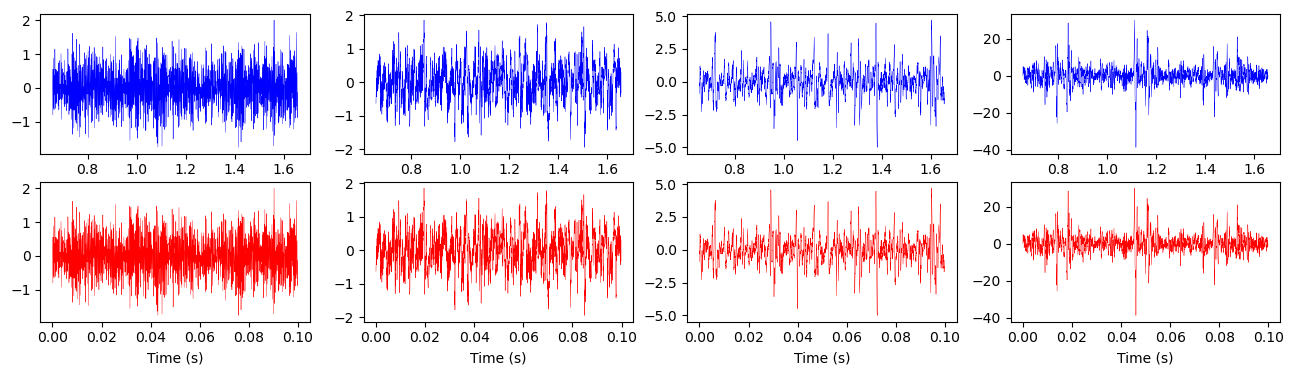

In [125]:
## 绘制振动信号图
import matplotlib.pyplot as plt
import numpy as np

time = np.arange(0, 2560, 1) * 0.000039
length = 2560
fig ,ax = plt.subplots(2, 4)
fig.set_size_inches(16, 4)
# ax = fig.add_subplot(111, projection='3d')
# plt.plot(bearing_data.loc[ 0:2000:500, 'micro'], bearing_data.loc[0:2000:500, 'Horizontal_acceleration'])
# plt.scatter(bearing_data.loc[ 0:2000:10, 'micro'], bearing_data.loc[0:2000:10, 'Horizontal_acceleration'])
# ax.set_xticks(range(60000, 200000, 10000))
# ax.set_yticks([])
ax[0][0].plot(bearing_newdata.loc[ 0:length:1, 'time'], bearing_newdata.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'b', label = 'Horizontal_acceleration')
ax[0][0].set_xlabel('Time (us)')
ax[0][1].plot(bearing_newdata_midterm.loc[ 0:length:1, 'time'], bearing_newdata_midterm.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'b', label = 'Horizontal_acceleration')
ax[0][1].set_xlabel('Time (us)')
ax[0][2].plot(bearing_newdata_mid2end.loc[ 0:length:1, 'time'], bearing_newdata_mid2end.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'b', label = 'Horizontal_acceleration')
ax[0][2].set_xlabel('Time (us)')
ax[0][3].plot(bearing_newdata_end.loc[ 0:length:1, 'time'], bearing_newdata_end.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'b', label = 'Horizontal_acceleration')
ax[0][3].set_xlabel('Time (us)')
ax[1][0].plot(time, bearing_newdata.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'r', label = 'Horizontal_acceleration')
ax[1][0].set_xlabel('Time (s)')
ax[1][1].plot(time, bearing_newdata_midterm.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'r', label = 'Horizontal_acceleration')
ax[1][1].set_xlabel('Time (s)')
ax[1][2].plot(time, bearing_newdata_mid2end.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'r', label = 'Horizontal_acceleration')
ax[1][2].set_xlabel('Time (s)')
ax[1][3].plot(time, bearing_newdata_end.loc[0:length:1, 'Horizontal_acceleration'], linewidth = 0.3, c = 'r', label = 'Horizontal_acceleration')
ax[1][3].set_xlabel('Time (s)')


del length, fig, ax, time


### 频域信号


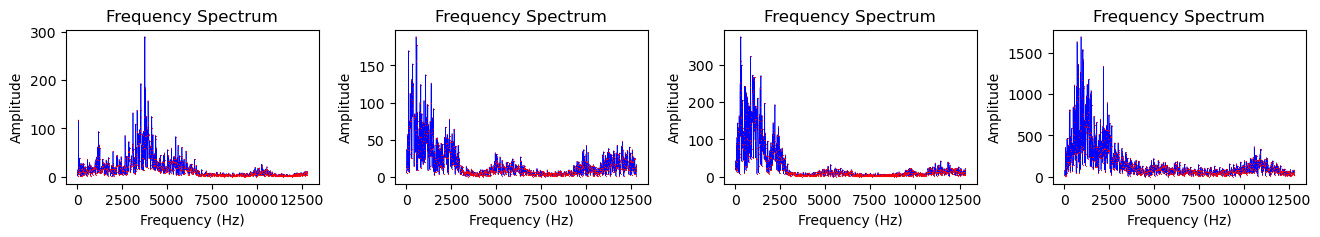

In [124]:
# 对原始信号进行傅里叶变换
n = len(bearing_newdata.loc[:, 'Horizontal_acceleration'])
def fft_transform(data):
    # 计算采样频率
    fs = 1 / (data['time'][1] - data['time'][0]).total_seconds()
    # 计算信号的长度
    n = len(data.loc[:, 'Horizontal_acceleration'])
    # 计算频率
    f = np.linspace(0, fs, n)
    # 计算频谱
    fft = np.fft.fft(data['Horizontal_acceleration'])
    # 计算频谱的幅值
    fft_amp = np.abs(fft)
    # 计算频谱的相位
    fft_phase = np.angle(fft)
    return f, fft_amp

f, fft_amp = fft_transform(bearing_newdata)
f_midterm, fft_amp_midterm = fft_transform(bearing_newdata_midterm)
f_mid2end, fft_amp_mid2end = fft_transform(bearing_newdata_mid2end)
f_end, fft_amp_end = fft_transform(bearing_newdata_end)

# 绘制频谱图
fig, ax = plt.subplots(1, 4)
fig.set_size_inches(16, 2)
# 设置子图左右间距
plt.subplots_adjust(wspace = 0.3)
ax[0].plot(f[:n//2], fft_amp[:n//2], linewidth = 0.5, c = 'b', label = 'Amplitude', marker = 'o', markersize = 0.5, markerfacecolor = 'r', markeredgecolor = 'r', markeredgewidth = 0.3)
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Frequency Spectrum')
ax[1].plot(f_midterm[:n//2], fft_amp_midterm[:n//2], linewidth = 0.5, c = 'b', label = 'Amplitude', marker = 'o', markersize = 0.5, markerfacecolor = 'r', markeredgecolor = 'r', markeredgewidth = 0.3)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Frequency Spectrum')
ax[2].plot(f_mid2end[:n//2], fft_amp_mid2end[:n//2], linewidth = 0.5, c = 'b', label = 'Amplitude', marker = 'o', markersize = 0.5, markerfacecolor = 'r', markeredgecolor = 'r', markeredgewidth = 0.3)
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Frequency Spectrum')
ax[3].plot(f_end[:n//2], fft_amp_end[:n//2], linewidth = 0.5, c = 'b', label = 'Amplitude', marker = 'o', markersize = 0.5, markerfacecolor = 'r', markeredgecolor = 'r', markeredgewidth = 0.3)
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Amplitude')
ax[3].set_title('Frequency Spectrum')
plt.show()

del f, fft_amp, f_midterm, fft_amp_midterm, f_mid2end, fft_amp_mid2end, f_end, fft_amp_end
del fig, ax

## 计算振动信号的特征

#### 时域特征

- **峰值：** $P$
- **均方根值：**$ RMS = \sqrt{\frac{{\sum_{n = 1}^{N}}(x(n))^{2}}{N}} $
- **方差：**$\sigma^{2} = \frac{1}{N} \sum_{n = 1}^{N}\left(x_{n}-\bar{X}\right)^{2}$
- **整流平均值：**   【信号数据绝对值的平均值】   $Rectified average=\frac{\sum_{n=1}^{N}\left | x(n) \right | }{N} $
- **峰峰值：**      $PP= max-min$
- **方根幅值：**   Root mean square amplitude     $RMSA=\left [ \frac{\sum_{n=1}^{N} \sqrt{\left |x(n)  \right | } }{N}  \right ] ^{2}$
- **峭度：**        $=\frac{\sum_{n=1}^{N} \left [ x(n)-\bar{X}\right ] ^4}{(N-1)\sigma ^4} $
- **偏度：**        $=\frac{\sum_{n=1}\left[{N}-\bar{X}\right]^3}{(N-1)\sigma ^3}$
- **波形因子：**    $=\frac{RMS}{Rectified average}$
- **峰值因子：**    $ =\frac{P}{RMS}$
- **脉冲因子：**    $=\frac{P}{Rectified average}$
- **裕度因子：**    $\frac{P}{RMSA}$
- **冲击DB值：**    $$
- **能量**：$X_e = \sum^{N}_{n=1}x_n^2$
- 

In [ ]:
# 计算数据的统计特性

# 峰值
peak_value = bearing_data['Horizontal_acceleration'].max()  # 峰值
peak_index = bearing_data['Horizontal_acceleration'].idxmax()  # 峰值索引

# 均方根值
rms_value = np.sqrt(np.mean(bearing_data['Horizontal_acceleration']**2))

# 方差
variance_value = np.var(bearing_data['Horizontal_acceleration'])

# 整流平均值
rectified_mean = np.mean(np.abs(bearing_data['Horizontal_acceleration']))

# 峰峰值
peak_to_peak_value = bearing_data['Horizontal_acceleration'].max() - bearing_data['Horizontal_acceleration'].min()

# 方根幅值
rmsa = np.mean(np.sqrt(np.abs(bearing_data['Horizontal_acceleration'])))**2

# 峭度
kurtosis_value = bearing_data['Horizontal_acceleration'].kurt()     # 使用pandas的kurt()函数计算峭度

# 偏度
skewness_value = bearing_data['Horizontal_acceleration'].skew()     # 使用pandas的skew()函数计算偏度

# 波形因子
waveform_factor = rms_value / rectified_mean

# 峰值因子
peak_factor = peak_value / rms_value

# 脉冲因子
impulse_factor = peak_value / rectified_mean

# 裕度因子
margin_factor = peak_value / rmsa

# 能量
energy = np.sum(bearing_data['Horizontal_acceleration']**2)

# 打印统计特性
print('峰值:', peak_value)
print('峰值索引:', peak_index)
print('均方根值:', rms_value)
print('方差:', variance_value)
print('整流平均值:', rectified_mean)
print('峰峰值:', peak_to_peak_value)
print('方根幅值:', rmsa)
print('峭度:', kurtosis_value)
print('偏度:', skewness_value)
print('波形因子:', waveform_factor)
print('峰值因子:', peak_factor)
print('脉冲因子:', impulse_factor)
print('裕度因子:', margin_factor)


#### 频域特征

- 滚动体通过内圈频率（Ball Pass Frequency Inner Race，BPFI）：
- 滚动体通过外圈频率（Ball Pass Frequency Outer Race，BPFO）：
- 保持架旋转频率（Fundamental Train Frequency，FTF）：
- 滚动体自转频率（Ball Spain Frequency，BSF）：

令振动信号的频谱值fft为$y_n$，频率为$f_n$，频谱长度为N，则频域特征的计算公式如下：
- 平均频率：$f_{mean} = \frac{\sum_{n=1}^{N}y_n}{N}$
- 均方根频率：$f_{RMS} = \sqrt{\frac{\sum_{n=1}^{N}y_n^2}{N}}$
- 频率标准差：$\sigma_f = \sqrt{\frac{\sum_{n=1}^{N}(f_n-f_{mean})^2y_n}{N}}$
- 中心频率：$f_{median} = \frac{\sum_{n=1}^{N} y_n\cdot f_n}{\sum^{N}_{n=1}y_n}$

In [ ]:
N = len(bearing_data['Horizontal_acceleration'])
# 计算平均频率
f_mean = np.mean(f[np.where(fft_amp > 0.1 * fft_amp.max())])

# 计算频谱的主频
f_max = f[np.argmax(fft_amp)]

# 计算均方根频率
f_rms = np.sqrt(np.sum(fft_amp**2) / N)

# 计算频率标准差
f_std = np.sqrt(np.sum((f - f_mean)**2 * fft_amp**2) / N)

# 计算中心频率
f_median = np.sum(f * fft_amp) / np.sum(fft_amp)

### 时频域分析

时频域分析是将时域信号和频域信号结合起来进行分析，常用的方法有：
- 短时傅里叶变换（Short-Time Fourier Transform，STFT）
- 连续小波变换（Continuous Wavelet Transform，CWT）
- 离散小波变换（Discrete Wavelet Transform，DWT）
- 

#### 离散小波变换

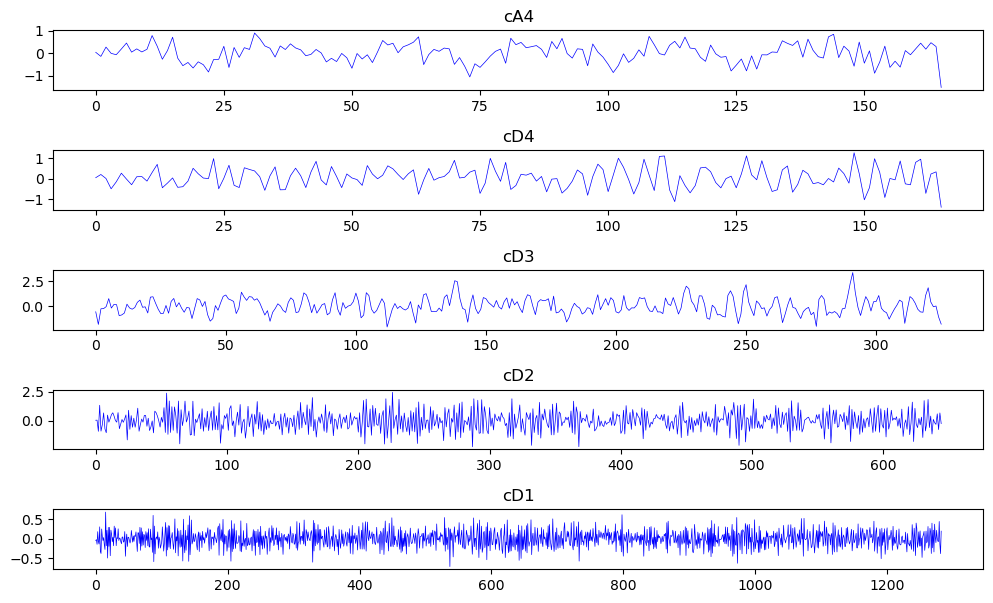

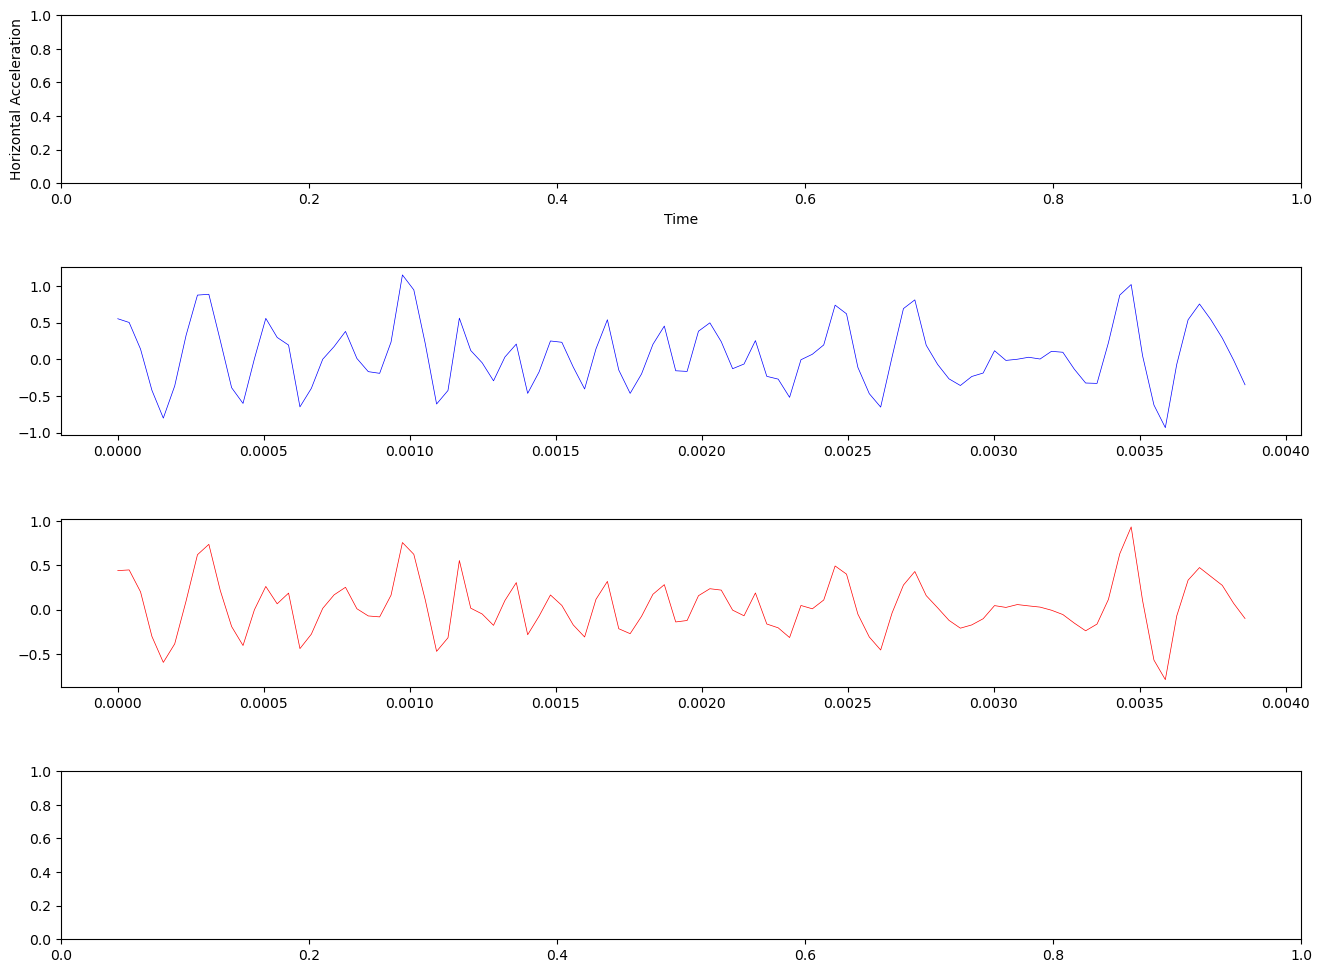

In [161]:
import pywt

# 进行小波变换
wavelet = 'db4'
level = 4
coeffs = pywt.wavedec(bearing_newdata['Horizontal_acceleration'], wavelet, level=level)
cA4, cD4, cD3, cD2, cD1 = coeffs

# 绘制小波系数
fig, ax = plt.subplots(5, 1)
# 设置子图之间的间距
fig.subplots_adjust(hspace=1)
fig.set_size_inches(12, 7)
ax[0].plot(cA4, linewidth = 0.5, c = 'b', label = 'cA4')
ax[0].set_title('cA4')
ax[1].plot(cD4, linewidth = 0.5, c = 'b', label = 'cD4')
ax[1].set_title('cD4')
ax[2].plot(cD3, linewidth = 0.5, c = 'b', label = 'cD3')
ax[2].set_title('cD3')
ax[3].plot(cD2, linewidth = 0.5, c = 'b', label = 'cD2')
ax[3].set_title('cD2')
ax[4].plot(cD1, linewidth = 0.5, c = 'b', label = 'cD1')
ax[4].set_title('cD1')

# 对小波系数进行统计特性计算
# 均值
# cA4_mean = np.mean(cA4)
# cD4_mean = np.mean(cD4)
# cD3_mean = np.mean(cD3)
# cD2_mean = np.mean(cD2)
# cD1_mean = np.mean(cD1)

# 方差
# cA4_var = np.var(cA4)
# cD4_var = np.var(cD4)
# cD3_var = np.var(cD3)
# cD2_var = np.var(cD2)
# cD1_var = np.var(cD1)

# 峰值
# cA4_peak = np.max(cA4)
# cD4_peak = np.max(cD4)
# cD3_peak = np.max(cD3)
# cD2_peak = np.max(cD2)
# cD1_peak = np.max(cD1)

# 对小波系数进行去噪
# 去噪
threshold = 0.1
cA4 = pywt.threshold(cA4, threshold * np.max(cA4))
cD4 = pywt.threshold(cD4, threshold * np.max(cD4))
cD3 = pywt.threshold(cD3, threshold * np.max(cD3))
cD2 = pywt.threshold(cD2, threshold * np.max(cD2))
cD1 = pywt.threshold(cD1, threshold * np.max(cD1))

# 重构信号
reconstructed_signal = pywt.waverec([cA4, cD4, cD3, cD2, cD1], wavelet)

# 绘制重构信号
length = 100
fig, ax = plt.subplots(4, 1)
fig.set_size_inches(16, 12)
fig.subplots_adjust(hspace= 0.5)
# ax[0].plot(bearing_newdata['time'], bearing_newdata['Horizontal_acceleration'], linewidth = 0.5, c = 'b', label = 'Original Signal')
ax[1].plot(np.arange(0, length, 1) * 0.000039, bearing_newdata.loc[0:length-1:1, 'Horizontal_acceleration'], linewidth = 0.5, c = 'b', label = 'Original Signal')
# ax[2].plot(bearing_newdata['time'], reconstructed_signal, linewidth = 0.5, c = 'r', label = 'Reconstructed Signal')
ax[2].plot(np.arange(0, length, 1) * 0.000039, reconstructed_signal[0:length:1], linewidth = 0.5, c = 'r', label = 'Reconstructed Signal')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Horizontal Acceleration')
# ax[2].set_title('Reconstructed Signal')
# plt.legend()
plt.show()

del level, wavelet, coeffs, cA4, cD4, cD3, cD2, cD1, fig, ax, threshold, length
# del ,reconstructed_signal

#### 连续小波变换分析

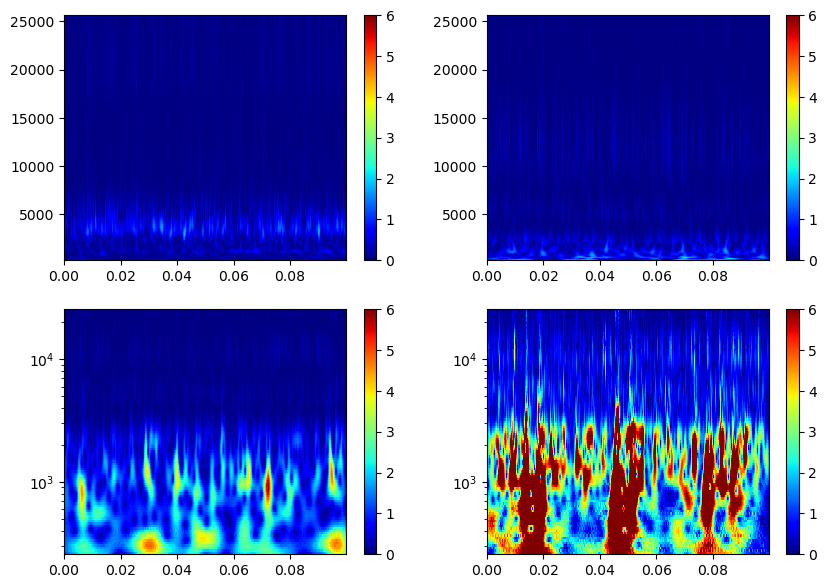

In [233]:
# 绘制时频域热力图
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
time = np.arange(0, len(bearing_newdata['Horizontal_acceleration']), 1)* 0.000039
widths = np.geomspace(1, 100, num=100)
# widths = [1, 2, 3, 5]
sampling_period= 0.000039
cwtmatr, freqs = pywt.cwt(bearing_newdata['Horizontal_acceleration'], widths, 'cmor1.5-1.0', sampling_period= sampling_period, )
cwtmatr = np.abs(cwtmatr[:-1, :-1])
cwtmatr_midterm, freqs_midterm = pywt.cwt(bearing_newdata_midterm['Horizontal_acceleration'], widths, 'cmor1.5-1.0', sampling_period= sampling_period, )
cwtmatr_midterm = np.abs(cwtmatr_midterm[:-1, :-1])
cwtmatr_mid2end, freqs_mid2end = pywt.cwt(bearing_newdata_mid2end['Horizontal_acceleration'], widths, 'cmor1.5-1.0', sampling_period= sampling_period, )
cwtmatr_mid2end = np.abs(cwtmatr_mid2end[:-1, :-1])
cwtmatr_end, freqs_end = pywt.cwt(bearing_newdata_end['Horizontal_acceleration'], widths, 'cmor1.5-1.0', sampling_period= sampling_period, )
cwtmatr_end = np.abs(cwtmatr_end[:-1, :-1])

vmax = np.max(10)
vmin = np.min(0)
pcm0 = ax[0][0].pcolormesh(time, freqs, np.abs(cwtmatr), cmap='jet', vmax = 6, vmin = vmin)
pcm1 = ax[0][1].pcolormesh(time, freqs_midterm, np.abs(cwtmatr_midterm), cmap='jet', vmax = 6, vmin = vmin)
pcm2 = ax[1][0].pcolormesh(time, freqs_mid2end, np.abs(cwtmatr_mid2end), cmap='jet', vmax = 6, vmin = vmin)
pcm3 = ax[1][1].pcolormesh(time, freqs_end, np.abs(cwtmatr_end), cmap='jet', vmax = 6, vmin = vmin)
# ax[0][0].set_yscale("log")
# ax[0][0].set_xlabel('Time/s')
# ax[0][0].set_ylabel('Frequency')
# ax[0][1].set_yscale("log")
ax[1][0].set_yscale("log")
ax[1][1].set_yscale("log")

fig.colorbar(pcm0, ax=ax[0][0])
fig.colorbar(pcm1, ax=ax[0][1])
fig.colorbar(pcm2, ax=ax[1][0])
fig.colorbar(pcm3, ax=ax[1][1])
plt.show()

del fig, ax, time, widths, sampling_period,  pcm0, pcm1, pcm2, pcm3, 
del cwtmatr, freqs, cwtmatr_midterm, freqs_midterm, cwtmatr_mid2end, freqs_mid2end, cwtmatr_end, freqs_end
# del cwtmatr, freqs